# Markovian simulation

In [1]:
import gstlearn as gl
import gstlearn.plot as gp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = [1./10,1./10]
nx = [300,300]

In [3]:
db = gl.DbGrid.create(nx, dx)

In [14]:
import gstlearn as gl
import gstlearn.plot as gp
import numpy as np
import matplotlib.pyplot as plt
scale = 1
mesh = gl.MeshETurbo(nx,dx)
model = gl.Model.createFromParam(gl.ECov.MARKOV,range=scale,sill=1,flagRange=False)
#model = gl.Model.createFromParam(gl.ECov.BESSEL_K,param=1,range=scale,sill=1,flagRange=False)

cova = model.getCova(0)
cova.setMarkovCoeffs([1,-1,0.5,0.01])
Q = gl.PrecisionOp(mesh,model)


In [15]:

#poly = gl.ClassicalPolynomial([1,2.,1])
#Q.setPolynomialFromPoly(poly)

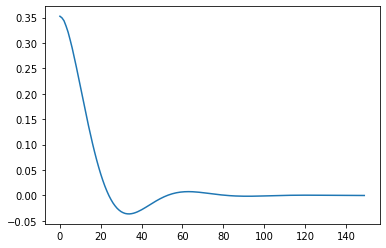

In [16]:
indx = int(nx[0]/2)
indy = int(nx[1]/2)
ind = indy + nx[1] * indx
cov = np.array(Q.evalCov(ind)).reshape(nx)
plt.plot(cov[indx,indy:(indy+nx[1])])

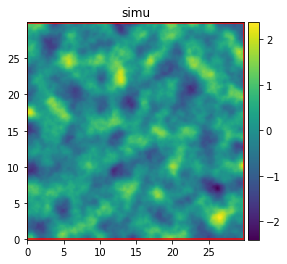

In [17]:
dbg = gl.DbGrid.create(nx,dx)
x = Q.simulate()[0]
dbg["simu"]=x
gp.plot(dbg)

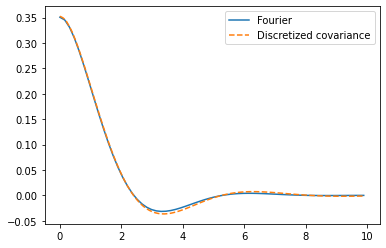

In [18]:
d = 2
N = 2**8
a= np.pi * (N-1) * dx[0] #3 x la portée
ind = np.arange(0,int(N/2),2)
v = np.linspace(-1.,1.,N)
u = a/2 * v
deltau=a/(N-1)
normxi = np.array([i**2 + j**2 for i in u for j in u])#.reshape((len(u),len(u)))

fourier = 1./(2*np.pi)**d * np.array([model.getCova(0).evalSpectrum(i) for i in normxi.reshape(-1)])

# Préparation pour gstlearn
# On met la matrice dans un vector double
f = fourier.reshape(-1)
ve = gl.VectorDouble(f.shape[0])
for i in range(ve.size()):
    ve[i]=f[i]
im = gl.VectorDouble()
gl.FFTn(2,[N,N],ve,im)

# Reformatage des sorties 
w=np.array(ve).reshape((len(u),len(u)))

#################################
A = w[0,:][ind]
covZ=A*deltau**d
X= np.pi * (v[ind]-v[0]) /deltau

plt.plot(X , covZ,label="Fourier")
uu = cov[indx,indy:(indy+100)]
plt.plot(np.arange(len(uu))*dx[0],uu,"--",label = "Discretized covariance")
ax = plt.legend()

In [9]:
from IPython.display import display, Latex
print(model.getCova(0).getFormula())
display(Latex('$%s$'%model.getCova(0).getFormula()))

C(h)=\int_{R^d} \frac{e^{-i\omega^t.h}}{P(||\omega||^2)}d\omega


<IPython.core.display.Latex object>